# Datathon_Proyecto_Establecimientos_Educativos

**Proyecto Análisis de datos.**

*  **Titulo:** Inclusión Educativa en Colombia: Análisis de la Capacidad Institucional para Atender a Estudiantes con Discapacidad en Contextos Rurales y Urbanos.

* **Descripción del reto:** Proyecto de análisis exploratorio cuyo proposito es aplicar todas las etapas del analisis de datos, desde la limpieza hasta la visualización de resultados, la aplicación de metodologías agiles, trabajo colaborativo y aplicación de modelos de aprendizaje automatico supervisado.

* **Hipótesis:** “Las instituciones educativas en zonas urbanas están mejor preparadas para atender a estudiantes con discapacidad que las rurales.”

* **Hipótesis Nula (H₀):**
No hay diferencia significativa en la preparación para atender a estudiantes con discapacidad entre instituciones educativas urbanas y rurales.

* **Hipótesis Alternativa (H₁):**
“Existe una diferencia significativa en la preparación para atender a estudiantes con discapacidad entre instituciones urbanas y rurales.”

---
# **Proceso ETL** (Extract, Transform and Load)

---
## 1. ***"E"*** (Extract)

Importar bibliotecas necesarias

In [ ]:
# Importar librerías para análisis
import pandas as pd
import numpy as np

# Importar librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)

# Configuración de estilo
sns.set(style="darkgrid")

Validacion de ruta

In [ ]:
import os

# Mostrar ruta actual
print("Directorio actual:", os.getcwd())

Directorio actual: /content


Cargar el archivo - Examinar Dataset

In [ ]:
# Nombre del archivo (mismo directorio)

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

ruta = '/content/drive/MyDrive/DATASET_LIMPIO_DATATHON_1.0 - DISCAPACIDADES DEPURADAS_v1.xlsx'
#df = pd.read_excel(file_path)


# Verificar si el archivo existe
import os
if not os.path.exists(ruta):
    print(f"Error: File not found at {ruta}")
else:
    # Ver hojas disponibles
    excel_file = pd.ExcelFile(ruta)
    print("Hojas disponibles:", excel_file.sheet_names)

    # Cargar la primera hoja del archivo
    df = pd.read_excel(excel_file, sheet_name=0)

    # Mostrar primeras filas
    display(df.head())

Mounted at /content/drive
Hojas disponibles: ['DISCAPACIDADES NO BORRAR', 'DATA_PRINCIPAL', 'FORMULA NO BORRAR', 'ESTRATO FORMULA', 'ESTRATO', 'CONCATENA']


,DISCAPACIDADES
0,DI-COGNITIVO
1,ENANISMO
2,HIPOACUSIA O BAJA AUDICIÓN
3,LESIÓN NEUROMUSCULAR
4,LIMITACIÓN FISICA (MOVILIDAD)


Motivación del Análisis

El presente análisis tiene como objetivo identificar si las instituciones educativas en zonas urbanas están mejor preparadas para atender a estudiantes con discapacidad que las zonas rurales.

Este estudio se basa en preguntas como:

•	Hay mayor presencia de atención a discapacidad en zonas urbanas.
•	Las instituciones rurales carecen de infraestructura o programas para estudiantes con discapacidad.
•	Hay diferencias por tipo de prestador (gobierno, comunidad religiosa, etc.)

Revision de  Dataset

Validaciòn de Contenido

In [ ]:
# Cargar las hojas específicas
df_DATA_PRINCIPAL = pd.read_excel(ruta, sheet_name='DATA_PRINCIPAL')
df_CONCATENA = pd.read_excel(ruta, sheet_name='CONCATENA')
df_ESTRATO = pd.read_excel(ruta, sheet_name='ESTRATO')

# Verificar contenido
print(df_DATA_PRINCIPAL.shape)
print(df_CONCATENA.shape)
print(df_ESTRATO.shape)

# Primeras filas del Dataset
df_DATA_PRINCIPAL.head()
df_CONCATENA.head()
df_ESTRATO.head()

(22530, 31)
(22530, 21)
(22530, 7)


,CODIGO_ESTABLECIMIENTO,ESTRATO 1,ESTRATO 2,ESTRATO 3,ESTRATO 4,ESTRATO 5,ESTRATO 6
0,368001000290,0,0,0,0,0,0
1,368001006298,0,0,0,0,0,0
2,368001000907,0,0,0,0,0,0
3,368077000264,0,0,0,0,0,0
4,354874000619,0,0,0,0,0,0


**Carga de datos desde un archivo Excel con múltiples hojas:**

pd.read_excel() se usa para leer datos desde un archivo Excel.

El parámetro sheet_name permite especificar qué hoja leer.

En este caso, se están leyendo tres hojas diferentes:

DATA_PRINCIPAL: Contiene la base principal con las variables institucionales.

CONCATENA: Contiene los datos de las discapacidades.

ESTRATO: Contiene información sobre clasificación socioeconómica de los tipos de establecimientos educativos.

**Verificación de dimensiones:**

.shape muestra el número de filas y columnas de cada DataFrame.

Esto permite verificar rápidamente si se cargaron correctamente y cuántos registros hay en cada uno.

**Visualización inicial de los datos:**

.head() muestra las primeras 5 filas de cada DataFrame.

Sirve para explorar rápidamente cómo están estructurados los datos, qué columnas hay, si hay valores nulos o inconsistencias.

Union de DataFrames

In [ ]:
# Union de DataFrames - Unión horizontal
df_unido = pd.concat([df_DATA_PRINCIPAL, df_CONCATENA,df_ESTRATO], axis=1)

# Primeras filas y columnas
df_unido.head()
df_unido.columns
df_unido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   AÑO                                   22530 non-null  int64 
 1   SECRETARÍA                            22530 non-null  object
 2   CODIGO_DEPARTAMENTO                   22530 non-null  int64 
 3   NOMBRE_DEPARTAMENTO                   22530 non-null  object
 4   CODIGO_MUNICIPIO                      22530 non-null  int64 
 5   NOMBRE_MUNICIPIO                      22530 non-null  object
 6   CODIGO_ESTABLECIMIENTO                22530 non-null  int64 
 7   NOMBRE_ESTABLECIMIENTO                22530 non-null  object
 8   ZONA                                  22528 non-null  object
 9   DIRECCIÓN                             22530 non-null  object
 10  TELÉFONO                              20298 non-null  object
 11  NOMBRE_RECTOR               

**Explicación y propósito:**
**Unión horizontal de DataFrames:**

pd.concat(..., axis=1) concatena varios DataFrames por columnas, es decir, une horizontalmente.

Esto se usa cuando cada DataFrame tiene la misma cantidad de filas (o están en el mismo orden) y se quiere combinarlos en uno solo para trabajar más fácilmente.

En este caso, se esta unificando los datos de las hojas: DATA_PRINCIPAL, CONCATENA y ESTRATO, ya que cada una contiene diferentes atributos de la misma institución educativa.

**Inspección inicial del DataFrame resultante (df_unido):**

df_unido.head() muestra las primeras filas del nuevo DataFrame combinado.

df_unido.columns muestra los nombres de todas las columnas unidas.

df_unido.info() da un resumen general: número de columnas, tipos de datos, cantidad de valores nulos, etc. Esto es clave antes de hacer limpieza o análisis.

---
## 2. ***"T"*** (Transform)

PROCESO LIMPIEZA DE DATOS

Durante el proceso de análisis, se realizaron las siguientes transformaciones y limpiezas sobre el conjunto de datos para garantizar la calidad y coherencia de la información:
### ✔ Identificaciòn y eliminacion de valores duplicados
### ✔ Identificaciòn valores nulos
### ✔ Creación o eliminacion de nuevas columnas
### ✔ Cambio de formato de variables

Identificaciòn Valores Duplicados

In [ ]:
# Revisión de registros duplicados en el DataFrame combinado.
# Esto nos permite verificar si hay filas exactamente iguales que podrían distorsionar el análisis.
# Un valor distinto de cero indicaría que hay datos repetidos que deben ser tratados o eliminados.

df_unido.duplicated().sum()

np.int64(0)

Identificaciòn Valores NULL

In [ ]:
# Conteo de valores nulos por columna
df_unido.isna().sum()

,0
AÑO,0
SECRETARÍA,0
CODIGO_DEPARTAMENTO,0
NOMBRE_DEPARTAMENTO,0
CODIGO_MUNICIPIO,0
NOMBRE_MUNICIPIO,0
CODIGO_ESTABLECIMIENTO,0
NOMBRE_ESTABLECIMIENTO,0
ZONA,2
DIRECCIÓN,0


Manejo de Valores Nullos

In [ ]:
# Rellenar nulos con un valor

# Columna Zona
print(df_unido['ZONA'].isna().sum())
df_unido['ZONA'] = df_unido['ZONA'].fillna('URBANA')
print(df_unido['ZONA'].isna().sum())

# Columna Nombre Rector
print(df_unido['NOMBRE_RECTOR'].isna().sum())
df_unido['NOMBRE_RECTOR'] = df_unido['NOMBRE_RECTOR'].fillna('NO REPORTADO')
print(df_unido['NOMBRE_RECTOR'].isna().sum())

2
0
20
0


Eliminación de columnas innecesarias

In [ ]:
# Eliminar columna innecesaria
columns_to_drop = ['CORREO_ELECTRÓNICO', 'TELÉFONO', 'GRADOS', 'NOMBRE_RECTOR']
existing_columns = [col for col in columns_to_drop if col in df_unido.columns]
df_unido.drop(columns=existing_columns, inplace=True)

En este bloque se realiza la carga del conjunto de datos desde un archivo xlx hacia el DataFrame df_unido.

Para garantizar robustez en la ejecución, se incluye una estructura try-except que captura el error en caso de que el archivo no se encuentre en la ruta especificada, lo cual permite advertir al usuario sobre la necesidad de corregir la ubicación del archivo.

A continuación, se procede a eliminar columnas consideradas innecesarias para el análisis: 'CORREO_ELECTRÓNICO', 'TELÉFONO', 'GRADOS' y 'NOMBRE_RECTOR'. Estas variables, aunque informativas, no aportan valor significativo al enfoque analítico del proyecto o pueden representar datos sensibles que no se desean procesar.

Antes de eliminar, se verifica que dichas columnas existan en el DataFrame mediante una validación condicional para evitar errores en caso de que alguna no esté presente.

Esta depuración contribuye a mantener un conjunto de datos más limpio, enfocado y manejable para los análisis posteriores.



### Creación de Columnas

In [ ]:
# Renombrar columnas
# df_unido.columns = df_unido.columns.str.strip().str.lower().str.replace(" ", "_")
# df_unido = df_unido.rename(columns={'Nombre Completo': 'nombre_completo'})

In [ ]:
# Nombre de las columnas
print(df_unido.columns.tolist())
df_unido.sample(5)

['AÑO', 'SECRETARÍA', 'CODIGO_DEPARTAMENTO', 'NOMBRE_DEPARTAMENTO', 'CODIGO_MUNICIPIO', 'NOMBRE_MUNICIPIO', 'CODIGO_ESTABLECIMIENTO', 'NOMBRE_ESTABLECIMIENTO', 'ZONA', 'DIRECCIÓN', 'TIPO_ESTABLECIMIENTO', 'ETNIAS', 'NIVELES', 'JORNADAS', 'ESPECIALIDAD', 'MODELOS_EDUCATIVOS', 'CAPACIDADES_EXCEPCIONALES', 'DISCAPACIDADES', 'IDIOMAS', 'NUMERO_DE_SEDES', 'PRESTADOR_DE_SERVICIO', 'PROPIEDAD_PLANTA_FISICA', 'RESGUARDO', 'MATRICULA_CONTRATADA', 'CALENDARIO', 'INTERNADO', 'ESTRATO_SOCIO_ECONÓMICO', 'CODIGO_ESTABLECIMIENTO', 'DI-COGNITIVO', 'ENANISMO', 'HIPOACUSIA O BAJA AUDICIÓN', 'LESIÓN NEUROMUSCULAR', 'LIMITACIÓN FISICA (MOVILIDAD)', 'MÚLTIPLE DISCAPACIDAD', 'OTRA DISCAPACIDAD', 'PARALISIS CEREBRAL', 'SA-USUARIO DE LSC', 'SÍNDROME DE DOWN', 'SISTÉMICA', 'SORDERA PROFUNDA', 'SORDOCEGUERA', 'SV-BAJA VISIÓN', 'SV-CEGUERA', 'TRANSTORNO DEL ESPECTRO AUTISTA', 'VOZ Y HABLA', 'PSICOSOCIAL', 'SA-USUARIO DE CASTELLANO', 'SUMA TOTAL POR INSTITUCION EDUCATIVA', 'CODIGO_ESTABLECIMIENTO', 'ESTRATO 1', '

,AÑO,SECRETARÍA,CODIGO_DEPARTAMENTO,NOMBRE_DEPARTAMENTO,CODIGO_MUNICIPIO,NOMBRE_MUNICIPIO,CODIGO_ESTABLECIMIENTO,NOMBRE_ESTABLECIMIENTO,ZONA,DIRECCIÓN,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,IDIOMAS,NUMERO_DE_SEDES,PRESTADOR_DE_SERVICIO,PROPIEDAD_PLANTA_FISICA,RESGUARDO,MATRICULA_CONTRATADA,CALENDARIO,INTERNADO,ESTRATO_SOCIO_ECONÓMICO,CODIGO_ESTABLECIMIENTO,DI-COGNITIVO,ENANISMO,HIPOACUSIA O BAJA AUDICIÓN,LESIÓN NEUROMUSCULAR,LIMITACIÓN FISICA (MOVILIDAD),MÚLTIPLE DISCAPACIDAD,OTRA DISCAPACIDAD,PARALISIS CEREBRAL,SA-USUARIO DE LSC,SÍNDROME DE DOWN,SISTÉMICA,SORDERA PROFUNDA,SORDOCEGUERA,SV-BAJA VISIÓN,SV-CEGUERA,TRANSTORNO DEL ESPECTRO AUTISTA,VOZ Y HABLA,PSICOSOCIAL,SA-USUARIO DE CASTELLANO,SUMA TOTAL POR INSTITUCION EDUCATIVA,CODIGO_ESTABLECIMIENTO,ESTRATO 1,ESTRATO 2,ESTRATO 3,ESTRATO 4,ESTRATO 5,ESTRATO 6
17056,2016,IBAGUE,73,TOLIMA,73001,IBAGUÉ,373001009762,LICEO INF MANANTIAL DEL SABER,URBANA,CASA 44,CENTRO EDUCATIVO,NaN,PREESCOLAR,COMPLETA,NaN,EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,376109008960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,376109008960,0,0,0,0,0,0
7246,2016,ANTIOQUIA,5,ANTIOQUIA,5282,FREDONIA,205282000602,I. E. LLANO GRANDE,RURAL,CORREG. MARSELLA,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",COMPLETA,ACADÉMICA,"PREESCOLAR ESCOLARIZADO_,POST PRIMARIA,MEDIA R...",NaN,NaN,NaN,4,OFICIAL,OFICIAL,NO APLICA,NO,A,NaN,ESTRATO 1,323162001977,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,323162001977,1,0,0,0,0,0
2139,2016,APARTADO,5,ANTIOQUIA,5045,APARTADÓ,305045001461,COLEGIO DIOCESANO,URBANA,KR 64 104 A 14,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,TARDE",ACADÉMICA,EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,ESTRATO 2,205001001389,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205001001389,0,1,0,0,0,0
19250,2016,NARIÑO,52,NARIÑO,52473,MOSQUERA,252473001046,CENTRO EDUCATIVO CAMPO ALEGRE,RURAL,VEREDA CAMPO ALEGRE MPIO MOSQUERA,CENTRO EDUCATIVO,NaN,"PREESCOLAR,BÁSICA SECUNDARIA,BÁSICA PRIMARIA","MAÑANA,NOCTURNA",NaN,"PROGRAMA PARA JÓVENES EN EXTRAEDAD Y ADULTOS,A...",NaN,NaN,NaN,1,OFICIAL,OFICIAL,NO APLICA,NO,A,NaN,NaN,308573074895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,308573074895,0,0,0,0,0,0
9339,2016,NORTE SANTANDER,54,NORTE DE SANTANDER,54498,OCAÑA,154498000042,INST TECNICO INDUSTRIAL LUCIO PABON NUÑEZ,URBANA,IND TRANSV 30 7-110,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,COMPLETA,TARDE,FIN DE SEMANA","INDUSTRIAL,ACADÉMICA","CAMINAR EN SECUNDARIA,A CRECER,EDUCACIÓN TRADI...",NaN,NaN,NaN,3,OFICIAL,OFICIAL,NO APLICA,SI,A,NaN,NaN,213188000057,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,213188000057,0,0,0,0,0,0


### Conversión de Tipos de Datos

Cambio de formato de variables:
Algunas columnas fueron transformadas a formatos adecuados para su análisis:

Conversión de variables categóricas:
Se transformaron columnas como "", "", "Zona" al tipo category.


**Justificación:** Mejora el rendimiento en análisis y reduce el uso de memoria. Estas columnas contienen valores repetitivos y finitos.

In [ ]:
# Esta línea convierte la columna 'AÑO' a un formato de fecha y hora (datetime64[ns]).

df_unido.info()
df_unido['AÑO'] = pd.to_datetime(df_unido['AÑO'], errors='coerce')
df_unido['AÑO'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 55 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   AÑO                                   22530 non-null  int64 
 1   SECRETARÍA                            22530 non-null  object
 2   CODIGO_DEPARTAMENTO                   22530 non-null  int64 
 3   NOMBRE_DEPARTAMENTO                   22530 non-null  object
 4   CODIGO_MUNICIPIO                      22530 non-null  int64 
 5   NOMBRE_MUNICIPIO                      22530 non-null  object
 6   CODIGO_ESTABLECIMIENTO                22530 non-null  int64 
 7   NOMBRE_ESTABLECIMIENTO                22530 non-null  object
 8   ZONA                                  22530 non-null  object
 9   DIRECCIÓN                             22530 non-null  object
 10  TIPO_ESTABLECIMIENTO                  22530 non-null  object
 11  ETNIAS                      

In [ ]:
# Lista de columnas a convertir a categoría
columnas_categoricas = [
    'SECRETARÍA', 'NOMBRE_DEPARTAMENTO', 'NOMBRE_MUNICIPIO',
    'NOMBRE_ESTABLECIMIENTO', 'DIRECCIÓN',
    'TIPO_ESTABLECIMIENTO', 'ETNIAS', 'NIVELES',
    'JORNADAS', 'ESPECIALIDAD', 'MODELOS_EDUCATIVOS', 'CAPACIDADES_EXCEPCIONALES',
    'PRESTADOR_DE_SERVICIO', 'PROPIEDAD_PLANTA_FISICA', 'PROPIEDAD_PLANTA_FISICA',
    'RESGUARDO', 'MATRICULA_CONTRATADA', 'CALENDARIO', 'INTERNADO', 'ESTRATO_SOCIO_ECONÓMICO', 'IDIOMAS',
    'ZONA','DISCAPACIDADES' ]

# Conversión a tipo category
for col in columnas_categoricas:
    df_unido[col] = df_unido[col].astype('category')

# Verificar los nuevos tipos de datos
print("\nTipos de datos después de la conversión:")
print(df_unido.dtypes)


Tipos de datos después de la conversión:
AÑO                                     datetime64[ns]
SECRETARÍA                                    category
CODIGO_DEPARTAMENTO                              int64
NOMBRE_DEPARTAMENTO                           category
CODIGO_MUNICIPIO                                 int64
NOMBRE_MUNICIPIO                              category
CODIGO_ESTABLECIMIENTO                           int64
NOMBRE_ESTABLECIMIENTO                        category
ZONA                                          category
DIRECCIÓN                                     category
TIPO_ESTABLECIMIENTO                          category
ETNIAS                                        category
NIVELES                                       category
JORNADAS                                      category
ESPECIALIDAD                                  category
MODELOS_EDUCATIVOS                            category
CAPACIDADES_EXCEPCIONALES                     category
DISCAPACIDADES         



Conversión de columnas seleccionadas a tipo 'category' para optimizar el uso de memoria y mejorar el rendimiento, al trabajar con variables categóricas en el DataFrame 'df_unido'.

Esto es especialmente útil cuando las columnas contienen un número limitado de valores únicos.

Se realiza la conversión para las columnas listadas en 'columnas_categoricas'.

Luego se imprime el tipo de dato de cada columna para verificar que la conversión se haya aplicado correctamente.






In [ ]:
#Conteo del numero de sedes por institucion, donde se identifica una institucion con hasta 68 sedes
print(df_unido['NUMERO_DE_SEDES'].min())
print(df_unido['NUMERO_DE_SEDES'].max())

0
68


In [ ]:
 # Se crea un DataFrame con el conteo de instituciones por número de sedes, se identificaron dos instituciones sin otras sedes.
conteo_sedes = df_unido['NUMERO_DE_SEDES'].value_counts().reset_index()

# Renombrar las columnas
conteo_sedes.columns = ['NUMERO_DE_SEDES', 'NUMERO_DE_INSTITUCIONES']

# Ordenar por número de sedes de forma ascendente (opcional)
conteo_sedes = conteo_sedes.sort_values(by='NUMERO_DE_SEDES')

# Mostrar resultado con mensaje
print("Conteo de Instituciones según su número de sedes:")
print(conteo_sedes)

Conteo de Instituciones según su número de sedes:
    NUMERO_DE_SEDES  NUMERO_DE_INSTITUCIONES
36                0                        2
0                 1                    15682
1                 2                     1174
2                 3                     1063
3                 4                      865
4                 5                      669
5                 6                      583
6                 7                      414
7                 8                      376
8                 9                      297
9                10                      243
10               11                      210
11               12                      195
12               13                      143
13               14                       93
15               15                       82
14               16                       85
16               17                       74
17               18                       60
18               19                       52
19   

Reemplazo de variables en la columna Zona

In [ ]:
# Reemplazo de combinaciones específicas en la columna 'ZONA' por un valor único 'MIXTO'.
# Se detectaron entradas donde la zona aparece combinada como 'URBANA,RURAL' o 'RURAL,URBANA',
# y se unifican bajo la categoría 'MIXTO' para simplificar el análisis y evitar duplicados semánticos.

df_unido['ZONA'] = df_unido['ZONA'].replace(['URBANA,RURAL', 'RURAL,URBANA'], 'MIXTO')

# Conteo actualizado de la frecuencia de cada categoría en la columna 'ZONA'
# para verificar que el reemplazo se aplicó correctamente y observar la distribución resultante.


Zona_counts_actualizado = df_unido['ZONA'].value_counts()
print("Distribución actualizada por Zona:\n", Zona_counts_actualizado)

Distribución actualizada por Zona:
 ZONA
URBANA    14545
RURAL      6798
MIXTO      1187
Name: count, dtype: int64


<ipython-input-526-269019636>:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_unido['ZONA'] = df_unido['ZONA'].replace(['URBANA,RURAL', 'RURAL,URBANA'], 'MIXTO')


In [ ]:
# Conteo por zona
Zona_counts = df_unido['ZONA'].value_counts()
print("Distribución por Zona:\n", Zona_counts, "\n")

Distribución por Zona:
 ZONA
URBANA    14545
RURAL      6798
MIXTO      1187
Name: count, dtype: int64 



✔ Filtrado de registros relevantes

✔ Agrupación o agregación de datos

## EDA

### Estadística descriptiva de variables numéricas

In [ ]:
# Estadística descriptiva de variables numéricas
df_unido.describe()

,AÑO,CODIGO_DEPARTAMENTO,CODIGO_MUNICIPIO,CODIGO_ESTABLECIMIENTO,NUMERO_DE_SEDES,CODIGO_ESTABLECIMIENTO,DI-COGNITIVO,ENANISMO,HIPOACUSIA O BAJA AUDICIÓN,LESIÓN NEUROMUSCULAR,LIMITACIÓN FISICA (MOVILIDAD),MÚLTIPLE DISCAPACIDAD,OTRA DISCAPACIDAD,PARALISIS CEREBRAL,SA-USUARIO DE LSC,SÍNDROME DE DOWN,SISTÉMICA,SORDERA PROFUNDA,SORDOCEGUERA,SV-BAJA VISIÓN,SV-CEGUERA,TRANSTORNO DEL ESPECTRO AUTISTA,VOZ Y HABLA,PSICOSOCIAL,SA-USUARIO DE CASTELLANO,SUMA TOTAL POR INSTITUCION EDUCATIVA,CODIGO_ESTABLECIMIENTO,ESTRATO 1,ESTRATO 2,ESTRATO 3,ESTRATO 4,ESTRATO 5,ESTRATO 6
count,22530,22530.000000,22530.000000,2.253000e+04,22530.000000,2.253000e+04,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,2.253000e+04,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000,22530.000000
mean,1970-01-01 00:00:00.000002016,37.865735,38129.373946,2.851908e+11,2.683622,2.851908e+11,0.084021,0.001731,0.044874,0.048114,0.009854,0.039592,0.007989,0.028318,0.001465,0.054461,0.000666,0.037195,0.001332,0.045850,0.022858,0.023613,0.000799,0.000799,0.001598,0.455126,2.851908e+11,0.127075,0.056502,0.029783,0.010519,0.003018,0.002441
min,1970-01-01 00:00:00.000002016,5.000000,5001.000000,1.050010e+11,0.000000,1.050010e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.050010e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1970-01-01 00:00:00.000002016,11.000000,11001.000000,2.238070e+11,1.000000,2.238070e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.238070e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970-01-01 00:00:00.000002016,25.000000,25899.000000,3.080011e+11,1.000000,3.080011e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.080011e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1970-01-01 00:00:00.000002016,66.000000,66001.000000,3.471890e+11,3.000000,3.471890e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.471890e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1970-01-01 00:00:00.000002016,99.000000,99773.000000,8.661700e+11,68.000000,8.661700e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.000000,8.661700e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,26.614388,26623.034552,9.146241e+10,3.765797,9.146241e+10,0.277426,0.041570,0.207031,0.214011,0.098777,0.195002,0.089027,0.165883,0.038244,0.226930,0.025795,0.189243,0.036467,0.209164,0.149455,0.151843,0.028255,0.028255,0.039942,1.497170,9.146241e+10,0.333064,0.230895,0.169991,0.102025,0.054856,0.049349


Estadísticas descriptivas de variables numéricas, corresponde a todas las variables numéricas que tenemos en el Dataset
1.	count: Número de valores no nulos en esa columna (todos tienen 22,530).
2.	mean: Promedio o media de los valores.
3.	std: Desviación estándar (qué tanto varían los datos respecto a la media).
4.	min: Valor mínimo.
5.	25%: Primer cuartil (el 25% de los datos está por debajo de este valor).
6.	50% (mediana): El 50% de los datos está por debajo de este valor.
7.	75%: Tercer cuartil (el 75% de los datos está por debajo de este valor).
8.	max: Valor máximo.

**Detalle:**

AÑO: Todos los valores son 2016 (no hay variación, por eso std = 0.0).
CODIGO_DEPARTAMENTO / CODIGO_MUNICIPIO / CODIGO_ESTABLECIMIENTO: Son identificadores numéricos, no tienen un análisis estadístico útil por sí solos, pero: Puedes ver su rango (min a max) y cómo están distribuidos.
Promedio: 2.68 sedes por establecimiento.
Máximo: 68 sedes (valor muy alto que podría ser un outlier).
Mediana (50%): 1 sede (la mayoría tienen pocas sedes).


Condiciones especiales
-	1 significa presencia de la condición.
-	0 significa ausencia.

Análisis de Inclusión – Prevalencia por Tipo de Discapacidad
Tipo de discapacidad o condición	% de inclusión (media)

DI-COGNITIVO	8.4%

SÍNDROME DE DOWN	5.4%

LESIÓN NEUROMUSCULAR	4.8%

SV-BAJA VISIÓN	4.6%

HIPOACUSIA O BAJA AUDICIÓN	4.4%

MÚLTIPLE DISCAPACIDAD	4.0%

SORDERA PROFUNDA	3.7%

PARÁLISIS CEREBRAL	2.8%

TRASTORNO DEL ESPECTRO AUTISTA (TEA)	2.4%

SV-CEGUERA	2.3%

NO APLICA (registro sin condición o desconocida)	1.8%

LIMITACIÓN FÍSICA (MOVILIDAD)	0.98%

OTRA DISCAPACIDAD	0.79%

ENANISMO	0.17%

SA-USUARIO DE CASTELLANO	0.16%

SA-USUARIO DE LSC (lengua de señas colombiana)	0.15%

SORDOCEGUERA	0.13%

VOZ Y HABLA	0.08%

PSICOSOCIAL	0.08%

SISTÉMICA	0.07%






### Estadísticas descriptivas de variables no  numéricas

In [ ]:
# Estadísticas descriptivas de variables no  numéricas
df_unido.describe(exclude=['int64'], include=['object', 'category'])

,SECRETARÍA,NOMBRE_DEPARTAMENTO,NOMBRE_MUNICIPIO,NOMBRE_ESTABLECIMIENTO,ZONA,DIRECCIÓN,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,IDIOMAS,PRESTADOR_DE_SERVICIO,PROPIEDAD_PLANTA_FISICA,RESGUARDO,MATRICULA_CONTRATADA,CALENDARIO,INTERNADO,ESTRATO_SOCIO_ECONÓMICO
count,22530,22530,22530,22530,22530,22530,22530,914,22313,22340,11854,22254,378,3758,3186,22530,22530,22505,22530,22530,1551,4757
unique,95,33,1037,20692,3,21271,2,154,26,59,101,2403,21,496,13,13,14,273,2,3,7,16
top,BOGOTA,VALLE DEL CAUCA,"BOGOTÁ, D.C.",INSTITUTO CORFERRINI,URBANA,CENTRO,INSTITUCION EDUCATIVA,NO APLICA,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,EDUCACIÓN TRADICIONAL,NO APLICA,NO APLICA,INGLÉS,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NINGUNO,ESTRATO 1
freq,2404,2485,2404,44,14545,34,11748,249,10380,4174,7453,10516,238,402,2896,10606,10586,21528,20396,21338,1078,2507



**Columnas del DataFrame Estadísticas descriptivas de variables no  numéricas:**

•	SECRETARÍA

•	NOMBRE_DEPARTAMENTO

•	NOMBRE_MUNICIPIO

•	NOMBRE_ESTABLECIMIENTO

•	ZONA

•	DIRECCIÓN

•	NOMBRE_RECTOR

•	TIPO_ESTABLECIMIENTO

**Resumen de las variables**

•	Count: número total de registros no nulos para esa variable.

•	Unique: número de valores únicos distintos en esa columna.

•	Top: el valor más frecuente (la moda) en esa columna.

•	Freq: la frecuencia (cuántas veces aparece) del valor más frecuente (top).







### AGRUPACIÓN DE DATOS ESTABECIMIENTO Y ZONA

In [ ]:
# Mostrar las columnas específicas del DataFrame donde se realiza tabla cruzada
df_unido[['TIPO_ESTABLECIMIENTO', 'ZONA']]

#Combinación de "Nivel de Estudio" y "Situación Laboral",
conteo = df_unido.groupby(['TIPO_ESTABLECIMIENTO', 'ZONA']).size().reset_index(name='Cantidad')
print(conteo)

# con tabla cruzada
tabla_cruzada = pd.crosstab(df_unido['TIPO_ESTABLECIMIENTO'], df_unido['ZONA'])
print(tabla_cruzada)

    TIPO_ESTABLECIMIENTO    ZONA  Cantidad
0       CENTRO EDUCATIVO   RURAL      2824
1       CENTRO EDUCATIVO   MIXTO        15
2       CENTRO EDUCATIVO  URBANA      7943
3  INSTITUCION EDUCATIVA   RURAL      3974
4  INSTITUCION EDUCATIVA   MIXTO      1172
5  INSTITUCION EDUCATIVA  URBANA      6602
ZONA                   RURAL  MIXTO  URBANA
TIPO_ESTABLECIMIENTO                       
CENTRO EDUCATIVO        2824     15    7943
INSTITUCION EDUCATIVA   3974   1172    6602


<ipython-input-531-4180150568>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_unido.groupby(['TIPO_ESTABLECIMIENTO', 'ZONA']).size().reset_index(name='Cantidad')


**Este código tabla cruzada:**

Visualizar y analizar la relación entre dos variables categóricas: el tipo de establecimiento y la zona.

Identificar cuántos registros hay para cada combinación de tipo de establecimiento y zona.

Facilitar la interpretación de la distribución conjunta mediante tablas agrupadas y tablas cruzadas.

Ayuda en análisis exploratorios para entender patrones, posibles sesgos o diferencias entre zonas y tipos de establecimientos.

In [ ]:
# Selección de columnas específicas para el análisis:
# La columna 'TIPO_ESTABLECIMIENTO' para agrupar los datos.
# Las columnas de estratos socioeconómicos ('ESTRATO 1' a 'ESTRATO 6') para sumar la cantidad de personas por estrato.

columnas_estrato = ['ESTRATO 1','ESTRATO 2','ESTRATO 3','ESTRATO 4','ESTRATO 5','ESTRATO 6']
columnas = ['TIPO_ESTABLECIMIENTO'] + columnas_estrato
df_seleccionado = df_unido[columnas]

# Agrupación del DataFrame por 'TIPO_ESTABLECIMIENTO' y suma de los valores en cada columna de estrato.
# Esto permite obtener la cantidad total de personas en cada estrato socioeconómico, segmentado por tipo de establecimiento.

tabla_suma_estratos = df_seleccionado.groupby('TIPO_ESTABLECIMIENTO')[columnas_estrato].sum()

# Mostrar la tabla resultante que presenta la sumatoria de personas por estrato en cada tipo de establecimiento,
# facilitando el análisis de la distribución socioeconómica en los diferentes tipos de establecimientos.

print("Sumatoria de personas por tipo de establecimiento y estrato:")
display(tabla_suma_estratos)

Sumatoria de personas por tipo de establecimiento y estrato:


<ipython-input-532-1250116568>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_suma_estratos = df_seleccionado.groupby('TIPO_ESTABLECIMIENTO')[columnas_estrato].sum()


,ESTRATO 1,ESTRATO 2,ESTRATO 3,ESTRATO 4,ESTRATO 5,ESTRATO 6
TIPO_ESTABLECIMIENTO,,,,,,
CENTRO EDUCATIVO,836,426,351,125,33,27
INSTITUCION EDUCATIVA,2027,847,320,112,35,28


La tabla muestra la distribución acumulada de personas según estrato socioeconómico en cada tipo de establecimiento.

Este análisis permite identificar qué tipos de establecimientos atienden mayormente a poblaciones de estratos específicos, lo cual es útil para diseñar políticas educativas y sociales más focalizadas.

Por ejemplo, se puede observar si ciertos tipos de establecimientos concentran estudiantes de estratos bajos o altos, lo que puede reflejar diferencias en acceso, calidad o recursos.

Estos hallazgos son clave para orientar intervenciones que busquen mayor equidad en el sistema educativo.

Visualizaciones


Distribución de Discapacidades por Zona:


<ipython-input-533-3277914068>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discapacidad_counts_by_zone = df_discapacidades_por_zona.groupby('ZONA').sum()


        DI-COGNITIVO  ENANISMO  HIPOACUSIA O BAJA AUDICIÓN  LESIÓN NEUROMUSCULAR  LIMITACIÓN FISICA (MOVILIDAD)  MÚLTIPLE DISCAPACIDAD  NO APLICA  OTRA DISCAPACIDAD  PARALISIS CEREBRAL  PSICOSOCIAL  SA-USUARIO DE CASTELLANO  SA-USUARIO DE LSC  SISTÉMICA  SORDERA PROFUNDA  SORDOCEGUERA  SV-BAJA VISIÓN  SV-CEGUERA  SÍNDROME DE DOWN  TRANSTORNO DEL ESPECTRO AUTISTA  VOZ Y HABLA    nan
ZONA                                                                                                                                                                                                                                                                                                                                                                                            
RURAL            377        15                         154                   152                             48                    164         66                 54                  76            7                        15       

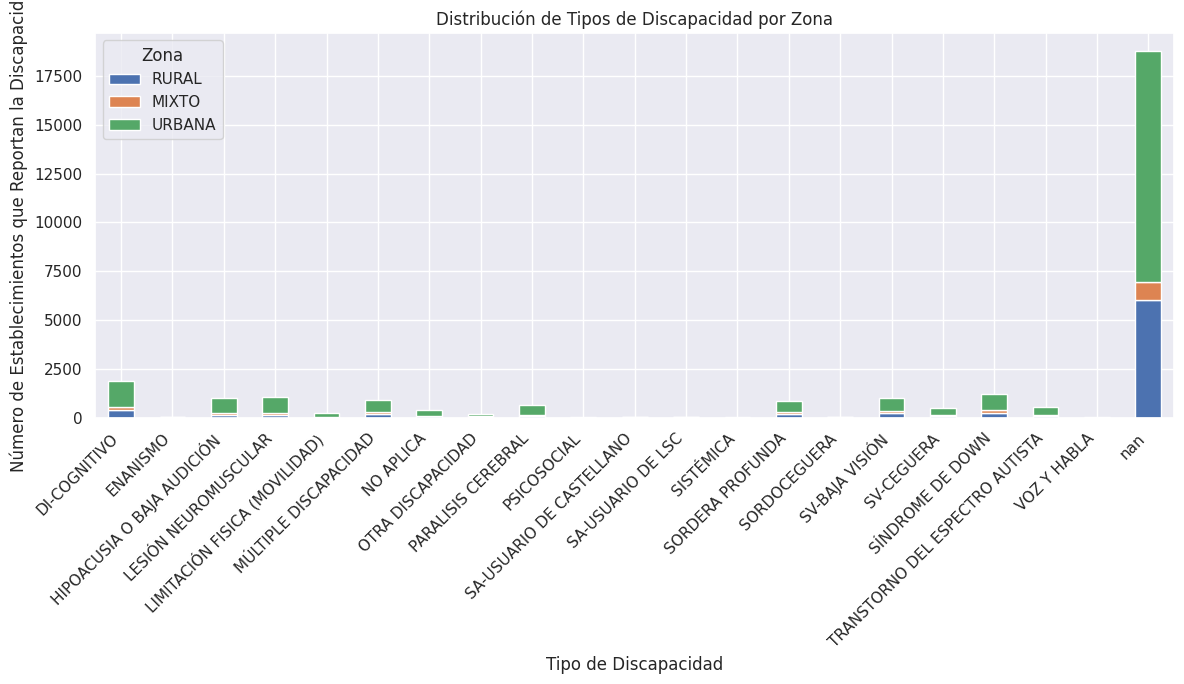

In [ ]:

import matplotlib.pyplot as plt
# Análisis de la Capacidad por Zona y Tipo de Discapacidad

# 1. Distribución de Discapacidades por Zona
print("\nDistribución de Discapacidades por Zona:")
# Desagrupar la columna DISCAPACIDADES si contiene múltiples valores separados por coma
# Esto es necesario si una fila puede tener más de una discapacidad reportada.
# Ajusta el separador (',') si tus datos usan otro.
df_discapacidades_expandidas = df_unido['DISCAPACIDADES'].str.get_dummies(sep=',')
df_discapacidades_por_zona = pd.concat([df_unido['ZONA'], df_discapacidades_expandidas], axis=1)

# Sumar las ocurrencias de cada discapacidad por zona
discapacidad_counts_by_zone = df_discapacidades_por_zona.groupby('ZONA').sum()
print(discapacidad_counts_by_zone)

# Visualización de la distribución de discapacidades por zona
discapacidad_counts_by_zone.T.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Distribución de Tipos de Discapacidad por Zona')
plt.xlabel('Tipo de Discapacidad')
plt.ylabel('Número de Establecimientos que Reportan la Discapacidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Zona')
plt.tight_layout()
plt.show()

**OBSERVACIONES**
La ‘Discapacidad Cognitiva (DI-COGNITIVO)’ es la más reportada en todas las zonas, la cual se reporta mucho más en zonas urbanas, la cual es la zona que reporta todos los tipos de discapacidad revisados en esta investigación. Esto puede deberse a una mayor cantidad de instituciones educativas, centros de salud o establecimientos censados en zonas urbanas, así como una mayor disposición a reportar o registrar estos datos. Las discapacidades sensoriales como Múltiple discapacidad y Síndrome neuromuscular también son muy frecuentes. Esto podría indicar una mejor capacidad de diagnóstico o mayor visibilidad - reportabilidad en zonas urbanas.

Con respecto a las discapacidades menos reportadas se encuentran: Voz y habla, Parálisis cerebral, otra discapacidad, y ceguera. Algunas discapacidades como hipoacusia, trastorno del lenguaje, y limitación física tienen presencia moderada, pero también reflejan una tendencia más alta en zona urbana..
Así mismo en las zonas Rurales y mixtas, existe una baja representación en los datos con respecto a las discapacidades registradas, esto se puede entender por la poca detección o sub registro así como barreras estructurales tales como falta de personal especializado, formación, recursos o acceso al sistema de información. Es probable que estos tipos de discapacidad estén presentes, pero no diagnosticados o informados.
Asi mismo el gran numero de datos 'NaN'es el dato mas significativo, lo que puede deberse a datos faltantes, errores o personas sin discapacidad reportada.


In [ ]:
# 2. Relación entre el Número de Discapacidades Reportadas y otras Variables por Zona
print("\nAnálisis de la relación entre el Número de Discapacidades Reportadas y otras variables por Zona:")

# Ejemplo: Relación con el Tipo de Establecimiento por Zona
print("\nRelación entre el Número de Discapacidades Reportadas y Tipo de Establecimiento por Zona:")
display(df_unido.groupby(['ZONA', 'TIPO_ESTABLECIMIENTO'])['SUMA TOTAL POR INSTITUCION EDUCATIVA'].agg(['count', 'mean', 'median']))


Análisis de la relación entre el Número de Discapacidades Reportadas y otras variables por Zona:

Relación entre el Número de Discapacidades Reportadas y Tipo de Establecimiento por Zona:


<ipython-input-534-3937078941>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df_unido.groupby(['ZONA', 'TIPO_ESTABLECIMIENTO'])['SUMA TOTAL POR INSTITUCION EDUCATIVA'].agg(['count', 'mean', 'median']))


count      mean  median
ZONA   TIPO_ESTABLECIMIENTO                          
RURAL  CENTRO EDUCATIVO        2824  0.325425     0.0
       INSTITUCION EDUCATIVA   3974  0.573226     0.0
MIXTO  CENTRO EDUCATIVO          15  0.000000     0.0
       INSTITUCION EDUCATIVA   1172  0.622867     0.0
URBANA CENTRO EDUCATIVO        7943  0.348735     0.0
       INSTITUCION EDUCATIVA   6602  0.538776     0.0

**OBSERVACIONES**

* En la zona rural, las Instituciones Educativas son mucho más numerosas y reportan un número ligeramente mayor de discapacidades en promedio que los Centros Educativos. La mediana de 1.0 para los Centros Educativos Rurales sugiere que la mitad de ellos reportan solo una o cero discapacidades, indicando una prevalencia muy baja en estos tipos de establecimientos más pequeños. Hay algunos valores atípicos que reportan un número significativamente mayor de discapacidades.

* La zona MIXTO solo contiene Instituciones educativas. La tabla muestra un count de 0, mean NaN y median NaN para esta categoría. Esto se correlaciona perfectamente con la ausencia de un box plot para "MIXTO - CENTRO EDUCATIVO" en la gráfica. Esto confirma que no hay datos registrados para Centros Educativos en zonas mixtas. Los datos para 'MIXTO' en la tabla resumen anterior (count=268, mean=4.04, median=3.0, std=3.19) corresponden enteramente a las Instituciones educativas en esa zona.

* En la zona urbana, las Instituciones Educativas son más numerosas que los Centros Educativos y reportan un promedio significativamente más alto de discapacidades (3.23 vs 2.15). La mediana es la misma (2.0) para ambos tipos, lo que sugiere que, si bien hay una cola de IE con más discapacidades, la mitad de los establecimientos urbanos de ambos tipos reportan 2 o menos.

**1. Distribución de Discapacidades por Zona**

Este bloque desagrega la columna DISCAPACIDADES para manejar casos donde un establecimiento reporta múltiples discapacidades separadas por comas. Luego, suma cada tipo de discapacidad por zona (urbana, rural, mixta, etc.) y genera una visualización de barras apiladas.

Esto permite observar qué tipos de discapacidades se reportan con mayor frecuencia en cada zona, facilitando la identificación de patrones geográficos en la capacidad institucional para atender distintas discapacidades.

**2. Relación entre Número de Discapacidades Reportadas y otras Variables por Zona**

En este último bloque se explora la relación entre el número de discapacidades reportadas y variables categóricas relevantes, como el tipo de establecimiento y el prestador de servicio, desglosadas por zona.

Se calculan estadísticas agrupadas y se generan visualizaciones con diagramas de caja para comparar cómo varía el número de discapacidades reportadas entre categorías y zonas.

Este análisis permite identificar si ciertos tipos de establecimientos o prestadores atienden a estudiantes con más discapacidades, y si esta dinámica cambia según la zona, lo que es clave para evaluar la capacidad institucional y focalizar intervenciones.



---
## 3. ***"L"*** (Load)

In [ ]:
# Guardar el dataframe limpio como archivo Excel
archivo_procesado = 'DATASET_FINAL_ESTABLECIMIENTOS-EDUCATIVOS-COLOMBIA_DISCAPACIDADES.xlsx'
df_unido.to_excel(archivo_procesado, index=False)

print(f'El conjunto de datos luego del procesamiento fue almacenado en la ruta:\n\t{archivo_procesado}')

El conjunto de datos luego del procesamiento fue almacenado en la ruta:
	DATASET_FINAL_ESTABLECIMIENTOS-EDUCATIVOS-COLOMBIA_DISCAPACIDADES.xlsx


---
# Análisis predictivo y Machine Learning

Para la aplicación de modelos de aprendizaje automático se realizaron en total 3 modelos diferentes. Dos de ellos de clasificación (aprendizaje automático supervisado) y uno de ellos de agrupación, empleando aprendizaje automático no supervisado.

A continuación desglosaremos los diferentes modelos y el porqué de su implementación, pero primero debemos proceder con la limpieza de columnas.

## Eliminación de columnas y limpieza:

##### Se eliminan columnas innecesarias como año, dirección, etnias, codigos, etcétera, puesto que no representan información valiosa para el entrenamiento del modelo.

##### Así mismo, no se tienen en cuenta aquellas columnas que no registran ningún tipo de estrato, pues no representan un información relevante de la que el modelo pueda aprender, ya que una de las categorías principales de las que debe aprender es Estrato

In [ ]:
#Se crea una copia del DataFrame final para no alterar los resultados anteriores
df_unido_ml = df_unido.copy()

#Se eliminan columnas innecesarias
df_unido_ml = df_unido_ml.drop(["AÑO", "SECRETARÍA", "CODIGO_DEPARTAMENTO", "CODIGO_MUNICIPIO", "CODIGO_ESTABLECIMIENTO", "DIRECCIÓN", "ETNIAS",
                                "NIVELES", "JORNADAS", "ESPECIALIDAD", "MODELOS_EDUCATIVOS", "CAPACIDADES_EXCEPCIONALES", "IDIOMAS",
                                "PRESTADOR_DE_SERVICIO", "PROPIEDAD_PLANTA_FISICA", "RESGUARDO", "MATRICULA_CONTRATADA", "CALENDARIO", "INTERNADO",
                                "ESTRATO_SOCIO_ECONÓMICO", "CODIGO_ESTABLECIMIENTO", "CODIGO_ESTABLECIMIENTO", "DISCAPACIDADES", "ESTRATO 1" , "ESTRATO 2",
                                "ESTRATO 3", "ESTRATO 4", "ESTRATO 5", "ESTRATO 6"], axis = 1)
df_unido_ml.head()

,NOMBRE_DEPARTAMENTO,NOMBRE_MUNICIPIO,NOMBRE_ESTABLECIMIENTO,ZONA,TIPO_ESTABLECIMIENTO,NUMERO_DE_SEDES,DI-COGNITIVO,ENANISMO,HIPOACUSIA O BAJA AUDICIÓN,LESIÓN NEUROMUSCULAR,LIMITACIÓN FISICA (MOVILIDAD),MÚLTIPLE DISCAPACIDAD,OTRA DISCAPACIDAD,PARALISIS CEREBRAL,SA-USUARIO DE LSC,SÍNDROME DE DOWN,SISTÉMICA,SORDERA PROFUNDA,SORDOCEGUERA,SV-BAJA VISIÓN,SV-CEGUERA,TRANSTORNO DEL ESPECTRO AUTISTA,VOZ Y HABLA,PSICOSOCIAL,SA-USUARIO DE CASTELLANO,SUMA TOTAL POR INSTITUCION EDUCATIVA
0,SANTANDER,BUCARAMANGA,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,INSTITUCION EDUCATIVA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,SANTANDER,BUCARAMANGA,COL ATENAS ...,URBANA,INSTITUCION EDUCATIVA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,INSTITUCION EDUCATIVA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL MIXTO SANTISIMA TRINIDAD,URBANA,INSTITUCION EDUCATIVA,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
4,NORTE DE SANTANDER,LOS PATIOS,COL DE BTO CIAL ISABEL LA CATOLICA,URBANA,INSTITUCION EDUCATIVA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 1. Modelo de clasificación binaria: Algoritmo Random Forest

**Objetivo:** Clasificar a las instituciones educativas en base a su capacidad de atender cierta cantidad de discapacidades, teniendo en cuenta su zona y numero de sedes.

Este fue el primer modelo de aprendizaje automático en nuestro proceso de análisis predictivo.
Decidimos optar por este ya que nos ayudaba a detectar patrones que permitan clasificar entre colegios bien o poco preparados.

In [ ]:
#Importamos las librerías para entrenamiento y visualización

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
sns.set_style('darkgrid')

**Limpieza de la columna zona**

In [ ]:
#Verifica valores únicos reales después de convertir a string
df_unido_ml['ZONA'] = df_unido_ml['ZONA'].astype(str)
print(df_unido_ml['ZONA'].unique())

['URBANA' 'RURAL' 'MIXTO']


In [ ]:
#Convertimos a string, quitamos espacios y pasamos a mayúsculas para evitar futuros errores
df_unido_ml['ZONA'] = df_unido_ml['ZONA'].astype(str).str.strip().str.upper()

#usamos .map() para reemplazar los valores de la columna "Zona" a un lenguaje que el modelo pueda entender (0,1 y 2)
df_unido_ml['ZONA'] = df_unido_ml['ZONA'].map({'URBANA': 0, 'RURAL': 1, "MIXTO": 2})

#Mostramos los valores nulos
print(df_unido_ml['ZONA'].isnull().sum())

0


In [ ]:
#una vez eliminados los valores nulos, convertimos la columna en tipo integer.
df_unido_ml['ZONA'] = df_unido_ml['ZONA'].astype(int)
df_unido_ml.head()

,NOMBRE_DEPARTAMENTO,NOMBRE_MUNICIPIO,NOMBRE_ESTABLECIMIENTO,ZONA,TIPO_ESTABLECIMIENTO,NUMERO_DE_SEDES,DI-COGNITIVO,ENANISMO,HIPOACUSIA O BAJA AUDICIÓN,LESIÓN NEUROMUSCULAR,LIMITACIÓN FISICA (MOVILIDAD),MÚLTIPLE DISCAPACIDAD,OTRA DISCAPACIDAD,PARALISIS CEREBRAL,SA-USUARIO DE LSC,SÍNDROME DE DOWN,SISTÉMICA,SORDERA PROFUNDA,SORDOCEGUERA,SV-BAJA VISIÓN,SV-CEGUERA,TRANSTORNO DEL ESPECTRO AUTISTA,VOZ Y HABLA,PSICOSOCIAL,SA-USUARIO DE CASTELLANO,SUMA TOTAL POR INSTITUCION EDUCATIVA
0,SANTANDER,BUCARAMANGA,FUND COL NUEVA GENERACION JUVENIL ...,0,INSTITUCION EDUCATIVA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,SANTANDER,BUCARAMANGA,COL ATENAS ...,0,INSTITUCION EDUCATIVA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL NUESTRA SEÑORA DEL ROSARIO,0,INSTITUCION EDUCATIVA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NORTE DE SANTANDER,VILLA DEL ROSARIO,COL MIXTO SANTISIMA TRINIDAD,0,INSTITUCION EDUCATIVA,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2
4,NORTE DE SANTANDER,LOS PATIOS,COL DE BTO CIAL ISABEL LA CATOLICA,0,INSTITUCION EDUCATIVA,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#creamos una nueva columna "Target" (lo que el modelo busca predecir = 0 - 1)
df_unido_ml["TARGET"] = df_unido_ml["SUMA TOTAL POR INSTITUCION EDUCATIVA"].apply(lambda x: 1 if x >= 3 else 0)

Creamos la columna "Target" en base a la columna "SUMA TOTAL POR INSTITUCION EDUCATIVA". Si la suma total de discapacidades por institucion es mayor o igual a 3, la columna target tomara el valor de 1. Si la suma es inferior a 3, tomara el valor de 0.

De esta forma clasificamos a las instituaciones educativas en 2 grupos.

*   Target 0 = Aquellos colegios que NO tiene la capacidad de atender mas de 3 tipos de discapacidades diferentes
*   Target 1 = Aquellos colegio que SI tienen cobertura para atender 3 o más tipos de discapacidades


In [ ]:
#Separamos el DataFrame en 2 partes:
df_mayoritaria= df_unido_ml[df_unido_ml["TARGET"] == 0] #Filtra Todas las filas donde TARGET == 0
df_minoritaria= df_unido_ml[df_unido_ml["TARGET"] == 1] #Filtra todas las filas donde TARGET == 1 (clase minoritaria)

In [ ]:
#Aplicamos un resample que nos permite aplicar múltiples agregaciones simultáneamente
df_mayoritaria_reducida = resample(
    df_mayoritaria,
    replace=False,            # sin reemplazo
    n_samples=len(df_minoritaria),  # Aqui iguala la cantidad de registros de clase 0 al número de registros de clase 1.
    random_state=42
)

In [ ]:
#concatenamos los 2 DataFrames
df_balanceado = pd.concat([df_mayoritaria_reducida, df_minoritaria])
df_balanceado = df_balanceado.sample(frac=1, random_state=42)

df_balanceado.value_counts("TARGET")

,count
TARGET,
0,1361
1,1361


In [ ]:
#Seleccionamos las columnas de discapacidades que estudiará nuestro modelo.
discap_cols = [
    'DI-COGNITIVO','ENANISMO','HIPOACUSIA O BAJA AUDICIÓN',
    'LESIÓN NEUROMUSCULAR','LIMITACIÓN FISICA (MOVILIDAD)',
    'MÚLTIPLE DISCAPACIDAD','OTRA DISCAPACIDAD','PARALISIS CEREBRAL',
    'SA-USUARIO DE LSC', 'SÍNDROME DE DOWN','SISTÉMICA',
    'SORDERA PROFUNDA', 'SV-BAJA VISIÓN','SORDOCEGUERA',
    'SV-CEGUERA','TRANSTORNO DEL ESPECTRO AUTISTA',
    'VOZ Y HABLA','PSICOSOCIAL','SA-USUARIO DE CASTELLANO']

In [ ]:
#Definimos nuestras etiquetas
base_features = ['ZONA', 'NUMERO_DE_SEDES']

#Preparamos la variable predictoria X y la variable objetivo y.
features = base_features
X = df_balanceado[features]
y = df_balanceado["TARGET"]

In [ ]:
# Nos aseguramos de que el balanceo y el uso de resample se haya ejecutado correctamente
y.value_counts()

,count
TARGET,
0,1361
1,1361


**Entrenamiento del modelo**

In [ ]:
#Hacemos la división para iniciar el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Entrenamos el modelo de clasificación con X_train y y_train
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)  # Usa el modelo entrenado para predecir la clase (0 o 1) de cada fila en X_test
y_proba = clf.predict_proba(X_test)[:, 1] #sacamos la probabilidad de que el colegio esté bien preparado

**Aplicación de metricas:**

🔵 1. Matriz de confusión:

In [ ]:
# Aplicamos la matriz de confusión para evaluar nuestro modelo
matriz_confusion_escuelas = confusion_matrix(y_test, y_pred)
print("=== Matriz de Confusión ===")
print(matriz_confusion_escuelas)

=== Matriz de Confusión ===
[[189  82]
 [177  97]]


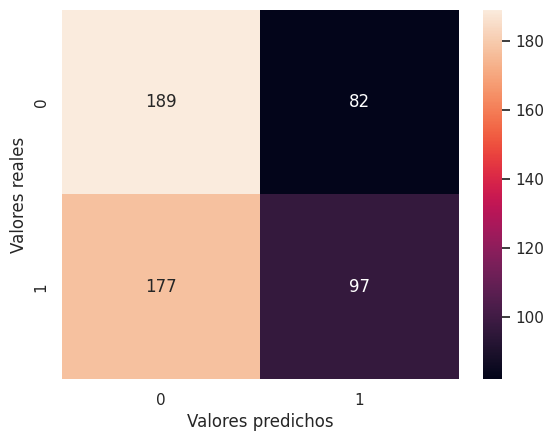

In [ ]:
#Generamos el gráfico de la matriz de confusión
sns.heatmap(matriz_confusion_escuelas, annot= True, fmt="d", cmap="rocket") # Se usa fmt="d" Formato decimal entero (evita la notación científica).
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.show()

La matriz de confusión muestra el desempeño del modelo al clasificar a las instituciones educativas en dos categorías: aquellas que no cumplen (clase 0) y aquellas que sí cumplen (clase 1) con el umbral propuesto de capacidad para atender distintos tipos de discapacidades.

* El modelo clasificó correctamente a 189 instituciones que no cumplían, y a 97 instituciones que sí cumplían.

* Sin embargo, se observaron 82 casos en los que se clasificó erróneamente como "cumple" a instituciones que en realidad no cumplían.

* Además, se cometieron 177 errores al clasificar como "no cumple" a instituciones que sí cumplían.

🔴 2. Reporte de clasificación y exactitud de predicción

In [ ]:
#accuracy score
accuracy_colegios = accuracy_score(y_test, y_pred)
accuracy_colegios

0.5247706422018349

In [ ]:
#Reporte de clasificación
print("\n=== Reporte de Clasificación ===")
print(classification_report(y_test, y_pred))


=== Reporte de Clasificación ===
              precision    recall  f1-score   support

           0       0.52      0.70      0.59       271
           1       0.54      0.35      0.43       274

    accuracy                           0.52       545
   macro avg       0.53      0.53      0.51       545
weighted avg       0.53      0.52      0.51       545



**El reporte de clasificación nos muestra:**

▶ Clase 0 (instituciones que no cumplen):

* Precision: 0.52 → Cuando predice "no cumple", acierta el 52% de las veces.
* Recall: 0.70 → Detecta el 70% de las instituciones que realmente no cumplían.
* F1-score: 0.59 → Un rendimiento medio.
* Support: 271 → Había 269 casos reales de esta clase.

▶ Clase 1 (instituciones que sí cumplen):

* Precision: 0.54 → Cuando predice "sí cumple", acierta el 54% de las veces.
* Recall: 0.35 → Solo detecta el 35% de las que realmente cumplían
* F1-score: 0.43 → Bastante bajo.
* Support: 274 → Había 276 casos reales de esta clase.

▶ Conclusiones:

- El modelo tiene mejor recall para la clase 0 (detecta más de las que no cumplen), pero tiene bajo recall para la clase 1 (se le escapan muchas que sí cumplen).

- Tiene mejor precisión para la clase 1, pero eso no ayuda si no las encuentra.

- F1-score más bajo para clase 1, lo que indica que el modelo no es bueno identificando a las instituciones que sí cumplen los criterios.

- Accuracy bajo (52%), lo que sugiere que en general no está clasificando bien.

🟡 3. Importancia de valores:

In [ ]:
# Importancia de valores
importancia = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
print("\n=== Importancia de Variables ===")
print(importancia)


=== Importancia de Variables ===
NUMERO_DE_SEDES    0.869438
ZONA               0.130562
dtype: float64


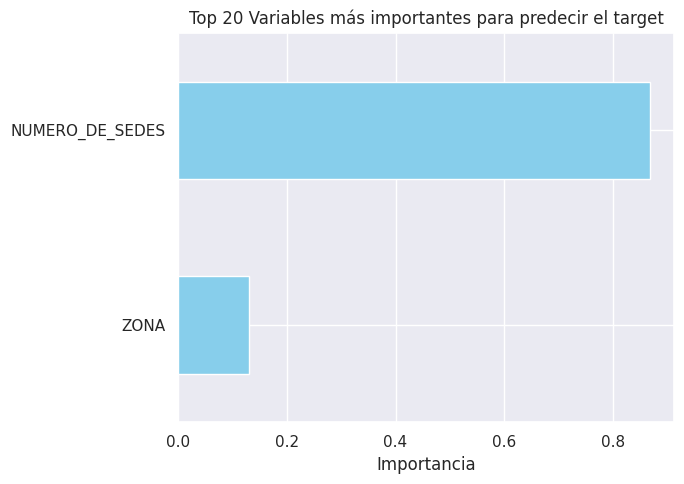

In [ ]:
importancia.head(20).plot(kind='barh', figsize=(7, 5), color='skyblue')
plt.title("Top 20 Variables más importantes para predecir el target")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

▶ Conclusiones:

En base a los resultados mostrados por el atributo "importancia de valores" podemos concluir que el modelo prioriza el numero de sedes por encima del tipo de zona (Rural o urbana) para predecir si un colegio está bien o mal preparado para atender estudiantes con discapacidades.

Dado este hallazgo, se le resta relevancia a nuestra hipótesis original y se reafirma nuestra hipótesis nula (H0).


**Testeo del modelo de aprendizaje usando RandomForest y datos de un colegio ficticio**

In [ ]:
#Creamos una variable de una institución con datos aleatorios
mi_colegio = {
    'ZONA': 1,
    'NUMERO_DE_SEDES': 4,
    'ESTRATO 1': 0,
    'ESTRATO 2': 1,
    'ESTRATO 3': 0,
    'ESTRATO 4': 0,
    'ESTRATO 5': 0,
    'ESTRATO 6': 0,
    'DI-COGNITIVO': 1,
    'ENANISMO': 0,
    'HIPOACUSIA O BAJA AUDICIÓN': 0,
    'LESIÓN NEUROMUSCULAR': 0,
    'LIMITACIÓN FISICA (MOVILIDAD)': 1,
    'MÚLTIPLE DISCAPACIDAD': 1,
    'OTRA DISCAPACIDAD': 1,
    'PARALISIS CEREBRAL': 1,
    'SA-USUARIO DE LSC': 0,
    'SÍNDROME DE DOWN': 1,
    'SISTÉMICA': 0,
    'SORDERA PROFUNDA': 0,
    'SORDOCEGUERA': 1,
    'SV-BAJA VISIÓN': 1,
    'SV-CEGUERA': 0,
    'TRANSTORNO DEL ESPECTRO AUTISTA': 0,
    'VOZ Y HABLA': 0,
    'PSICOSOCIAL': 1,
    'SA-USUARIO DE CASTELLANO': 0
}

In [ ]:
#Creamos una función para hacer una predicción personalizada
def predecir_colegio_preparado(modelo, datos_dict, columnas_modelo):
    df_unido_ml = pd.DataFrame([datos_dict])
    df_unido_ml = df_unido_ml.reindex(columns=columnas_modelo, fill_value=0)  # asegurar orden correcto
    pred = modelo.predict(df_unido_ml)[0]
    prob = modelo.predict_proba(df_unido_ml)[0][1]
    print(f"-Predicción: {'Bien preparado (1)' if pred == 1 else 'Poco preparado (0)'}")
    print(f"-Probabilidad de estar bien preparado: {prob:.2f}")

In [ ]:
# Ponemos en practica el modelo para predecir
predecir_colegio_preparado(clf, mi_colegio, features)

👆 Este codigo se define una función que sirve para hacer una predicción personalizada sobre un colegio nuevo usando el modelo que ya entrenamos.
La función Recibe los datos de un colegio ficticio (como diccionario) Los adapta al formato del modelo, predice si está bien preparado y muestra la probabilidad de preparación.
Los datos son asignados a la variable "mi_colegio" y pueden ser editados para ver las diferentes predicciones que hace el modelo.

🟢 **Conclusiones finales del modelo:**

El modelo logró identificar correctamente el 79% de las instituciones que no cumplen los criterios establecidos, pero solo el 38% de las que sí los cumplen. Aunque su precisión al predecir cumplimiento es razonable (65%), su baja sensibilidad en esa clase compromete la confiabilidad del modelo para identificar correctamente instituciones que bajo nuestro umbral puedan considerarse aptas para aceptar diferenter tipos de discapacidades. En general, el modelo presenta un rendimiento moderado, con una exactitud total del 58%, y aunque a simple vista el modelo tome en cuenta las caracteristicas mas importantes como la zona y numero de sedes, su exactitud no es lo suficientemente alta como para considerarlo en futuras predicciones con datos nuevos.

____________________________________________________________________________________________________

### 2. Modelo de clasificación multiclase: Algoritmo Random Forest

Debido al resultado arrojado por nuestro anterior modelo, decidimos implementar un enfoque distinto y un tipo de clasificación diferente.

* Objetivo: Predecir qué tipos de discapacidades puede atender un colegio, dada su zona y número de sedes.
* Tipo de modelo: Regresión o clasificación multietiqueta (e.g. MultiOutputClassifier con Random Forest, KNN, etc.)
* Features: Zona (rural/urbana codificada).
* Targets: 22 columnas de discapacidad (0 o 1).

In [ ]:
#Importamos las librerías para entrenamiento y visualización

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

**Defnimos nuestras etiquetas y caracteristicas**

In [ ]:
discap_cols = [
    'DI-COGNITIVO','ENANISMO','HIPOACUSIA O BAJA AUDICIÓN',
    'LESIÓN NEUROMUSCULAR','LIMITACIÓN FISICA (MOVILIDAD)',
    'MÚLTIPLE DISCAPACIDAD','OTRA DISCAPACIDAD','PARALISIS CEREBRAL',
    'SA-USUARIO DE LSC', 'SÍNDROME DE DOWN','SISTÉMICA',
    'SORDERA PROFUNDA', 'SV-BAJA VISIÓN','SORDOCEGUERA',
    'SV-CEGUERA','TRANSTORNO DEL ESPECTRO AUTISTA',
    'VOZ Y HABLA','PSICOSOCIAL','SA-USUARIO DE CASTELLANO']

X = df_unido_ml[discap_cols]
y = df_unido_ml['ZONA']

In [ ]:
#confirmamos la cantidad de datos por Zona
y.value_counts()

,count
ZONA,
0,14545
1,6798
2,1187


**Balanceamos las clases**

In [ ]:
# Combinar para balancear
data = pd.concat([X, y], axis=1)

# Separar clases
urbana = data[data['ZONA'] == 0]
rural = data[data['ZONA'] == 1]
mixto =data[data['ZONA'] == 2]

# Encontrar la clase minoritaria
min_count = min(len(urbana), len(rural), len(mixto))

In [ ]:
# Submuestrear todas al tamaño de la clase menor
urbana_bal = resample(urbana, replace=False, n_samples= min_count, random_state=42)
rural_bal = resample(rural, replace=False, n_samples=min_count, random_state=42)
mixta_bal = resample(mixto, replace=False, n_samples=min_count, random_state=42)

# Unir las tres clases balanceadas
data_bal = pd.concat([urbana_bal, rural_bal, mixta_bal])
data_bal = data_bal.sample(frac=1, random_state=42).reset_index(drop=True) #Baraja aleatoriamente todas las filas del nuevo DataFrame (data_bal)

In [ ]:
# Separar X - y balanceados
X_bal = data_bal[discap_cols]
y_bal = data_bal['ZONA']

# Confirmamos si el balanceo de ejecutó correctamente
print(y_bal.value_counts())

ZONA
2    1187
0    1187
1    1187
Name: count, dtype: int64


**Entrenamiento del modelo**

In [ ]:
#Hacemos la división para iniciar el entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Entrenamos el modelo
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = clf.predict(X_test)

**Métricas:**

🔴 1. Reporte de clasificación:

In [ ]:
# Revisamos lo evaluado:
print(classification_report(y_test, y_pred, target_names=['URBANA', 'RURAL', 'MIXTA']))

              precision    recall  f1-score   support

      URBANA       0.37      0.91      0.53       256
       RURAL       0.41      0.06      0.11       233
       MIXTA       0.45      0.08      0.14       224

    accuracy                           0.38       713
   macro avg       0.41      0.35      0.26       713
weighted avg       0.41      0.38      0.27       713



En base al reporte podemos deducir que:

**Zona Urbana**:
* Precision: 0.37 → Solo el 37% de las veces que el modelo predijo “URBANA” era correcto.
* Recall: 0.91 → De todas las instituciones realmente urbanas, el modelo detectó el 91%.
* F1-score: 0.53 → Un rendimiento decente, considerando el alto recall, pero no del todo bueno.

**Zona rural**

* Precision: 0.41 → De los que clasificó como rurales, 41% eran correctos.
* Recall: 0.06 → Un score muy bajo, solo detectó el 6% de las rurales reales.
* F1-score: 0.11 → Muy mal desempeño general en esta clase.

**Zona mixta**

* Precision: 0.45 → El modelo acertó el 45% de las veces al predecir “mixta”.
* Recall: 0.08 → Solo detecta el 8% de las mixtas reales.
* F1-score: 0.14 → También muy bajo rendimiento

▶ Conclusiones:

* El modelo solo está funcionando bien para identificar instituciones URBANAS.
Detecta casi todas las urbanas reales (recall de 0.91), aunque se equivoca bastante (precision de 0.37).

* Para RURAL y MIXTA, el modelo casi no las detecta. Tiene recall bajísimo (6% y 8%) y f1-scores muy pobres.

* Al tener un valor accurasy del 0.38, el modelo acierta solo el 38% de los casos totales, siendo un valor de exactitud muy bajo y con el cual no se puede predecir de forma correcta o creíble.

🔵 2. Matríz de confusión

In [ ]:
# Aplicamos la matriz de confusión para evaluar nuestro modelo
matriz_confusion_escuelas = confusion_matrix(y_test, y_pred)
print("=== Matriz de Confusión ===")
print(matriz_confusion_escuelas)

=== Matriz de Confusión ===
[[234  11  11]
 [206  15  12]
 [194  11  19]]


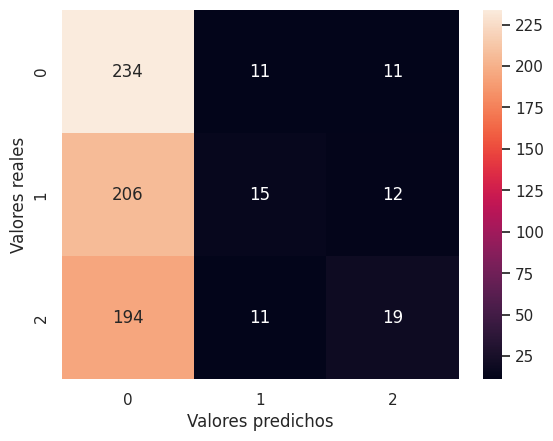

In [ ]:
# Generamos el gráfico de la matriz de confusión
sns.heatmap(matriz_confusion_escuelas, annot= True, fmt="d", cmap="rocket") # Se usa fmt="d" Formato decimal entero (evita la notación científica).
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.show()

▶ Conclusión:

* El modelo predice la clase 0 para casi todo.
* Detecta muy bien la clase 0 (234 aciertos de 256 casos reales → buen recall).
* Casi nunca acierta las clases 1 y 2, pues de 233 instituciones clase 1, solo acertó 15 y de 224 instituciones clase 2, solo acertó 19.
* Muchísimas instituciones clase 1 y 2 fueron clasificadas erróneamente como clase 0.
* Podemos incluso deducir que el modelo tiene sesgo fuerte hacia la clase 0.

🟢 **Conclusiones finales del modelo:**

El modelo muestra un desempeño muy desbalanceado en la clasificación de los tipos de instituciones educativas. Si bien identifica correctamente la mayoría de las instituciones urbanas (recall de 91%), falla gravemente al detectar instituciones rurales y mixtas, con tasas de recall del 6% y 8% respectivamente. Esto sugiere que el modelo tiene una alta sensibilidad hacia lo urbano, pero es deficiente en reconocer correctamente los demás contextos, lo cual limita seriamente su utilidad en escenarios educativos diversos.

El rendimiento de estos modelos predictivos puede deberse a la poca cantidad de datos e información valiosa presente en el Dataset para hacer énfasis y afirmar/refutar nuestras hipótesis, puesto que no disponemos de datos más específicos (como calidad de infraestructura, señalización, recursos, etc.) para determinar si un colegio es apto para atender alumnos con diferentes discapacidades o indicar si en base a estas mismas pertenece a una zona urbana, rural o mixta.



---



### 3. Modelo de aprendizaje no supervisado: Clustering - KMeans
Debido al los resultados no convincentes de nuestros anteriores modelos, decidimos implementar un enfoque distinto y un tipo de aprendizaje automático diferente.

* Objetivo: En lugar de predecir algo, nuestro objetivo es descubrir patrones o segmentos naturales dentro de los datos, es decir, encontrar patrones de inclusión.
* Tipo de modelo: Clustering
* Variables: zona, estrato socioeconomico, total de discapacidades por institución y número de sedes.

In [ ]:
# Creo una copia de mi dataset original (el que incluye estratos) y confirmo que todos los datos siguen siendo los mismos
df_unido_ml2 = df_unido.copy()
df_unido_ml2.head()

,AÑO,SECRETARÍA,CODIGO_DEPARTAMENTO,NOMBRE_DEPARTAMENTO,CODIGO_MUNICIPIO,NOMBRE_MUNICIPIO,CODIGO_ESTABLECIMIENTO,NOMBRE_ESTABLECIMIENTO,ZONA,DIRECCIÓN,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,IDIOMAS,NUMERO_DE_SEDES,PRESTADOR_DE_SERVICIO,PROPIEDAD_PLANTA_FISICA,RESGUARDO,MATRICULA_CONTRATADA,CALENDARIO,INTERNADO,ESTRATO_SOCIO_ECONÓMICO,CODIGO_ESTABLECIMIENTO,DI-COGNITIVO,ENANISMO,HIPOACUSIA O BAJA AUDICIÓN,LESIÓN NEUROMUSCULAR,LIMITACIÓN FISICA (MOVILIDAD),MÚLTIPLE DISCAPACIDAD,OTRA DISCAPACIDAD,PARALISIS CEREBRAL,SA-USUARIO DE LSC,SÍNDROME DE DOWN,SISTÉMICA,SORDERA PROFUNDA,SORDOCEGUERA,SV-BAJA VISIÓN,SV-CEGUERA,TRANSTORNO DEL ESPECTRO AUTISTA,VOZ Y HABLA,PSICOSOCIAL,SA-USUARIO DE CASTELLANO,SUMA TOTAL POR INSTITUCION EDUCATIVA,CODIGO_ESTABLECIMIENTO,ESTRATO 1,ESTRATO 2,ESTRATO 3,ESTRATO 4,ESTRATO 5,ESTRATO 6
0,1970-01-01 00:00:00.000002016,BUCARAMANGA,68,SANTANDER,68001,BUCARAMANGA,368001000290,FUND COL NUEVA GENERACION JUVENIL ...,URBANA,CLL 8 NO 22-57,INSTITUCION EDUCATIVA,NaN,"MEDIA,BÁSICA SECUNDARIA","MAÑANA,NOCTURNA",ACADÉMICA,EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,368001000290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,368001000290,0,0,0,0,0,0
1,1970-01-01 00:00:00.000002016,BUCARAMANGA,68,SANTANDER,68001,BUCARAMANGA,368001000907,COL ATENAS ...,URBANA,CR 26 NO 33-73,INSTITUCION EDUCATIVA,NaN,MEDIA,FIN DE SEMANA,ACADÉMICA,EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,368001006298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,368001006298,0,0,0,0,0,0
2,1970-01-01 00:00:00.000002016,NORTE SANTANDER,54,NORTE DE SANTANDER,54874,VILLA DEL ROSARIO,354874000619,COL NUESTRA SEÑORA DEL ROSARIO,URBANA,CLL 6 8-48 B.GRAMALOTE,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,368001000907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,368001000907,0,0,0,0,0,0
3,1970-01-01 00:00:00.000002016,NORTE SANTANDER,54,NORTE DE SANTANDER,54874,VILLA DEL ROSARIO,354874000830,COL MIXTO SANTISIMA TRINIDAD,URBANA,CR 6 5-32 CENTRO,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,368077000264,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,368077000264,0,0,0,0,0,0
4,1970-01-01 00:00:00.000002016,NORTE SANTANDER,54,NORTE DE SANTANDER,54405,LOS PATIOS,254405000409,COL DE BTO CIAL ISABEL LA CATOLICA,URBANA,AV 4 32 18 BARRIO CORDIALIDAD,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,TARDE",ACADÉMICA,EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,354874000619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,354874000619,0,0,0,0,0,0


**Limpieza de la columna Zona y cambio de tipo de dato**

In [ ]:
#Verifica valores únicos reales después de convertir a string
df_unido_ml2['ZONA'] = df_unido_ml2['ZONA'].astype(str)
print(df_unido_ml2['ZONA'].unique())

['URBANA' 'RURAL' 'MIXTO']


In [ ]:
#Convertimos a string, quitamos espacios y pasamos a mayúsculas para evitar futuros errores
df_unido_ml2['ZONA'] = df_unido_ml2['ZONA'].astype(str).str.strip().str.upper()

#usamos .map() para reemplazar los valores de la columna "Zona" a un lenguaje que el modelo pueda entender (0,1 y 2)
df_unido_ml2['ZONA'] = df_unido_ml2['ZONA'].map({'URBANA': 0, 'RURAL': 1, "MIXTO": 2})

#Mostramos los valores nulos
print(df_unido_ml2['ZONA'].isnull().sum())

0


In [ ]:
#una vez eliminados los valores nulos, convertimos la columna en tipo integer.
df_unido_ml2['ZONA'] = df_unido_ml2['ZONA'].astype(int)
df_unido_ml2.head()

,AÑO,SECRETARÍA,CODIGO_DEPARTAMENTO,NOMBRE_DEPARTAMENTO,CODIGO_MUNICIPIO,NOMBRE_MUNICIPIO,CODIGO_ESTABLECIMIENTO,NOMBRE_ESTABLECIMIENTO,ZONA,DIRECCIÓN,TIPO_ESTABLECIMIENTO,ETNIAS,NIVELES,JORNADAS,ESPECIALIDAD,MODELOS_EDUCATIVOS,CAPACIDADES_EXCEPCIONALES,DISCAPACIDADES,IDIOMAS,NUMERO_DE_SEDES,PRESTADOR_DE_SERVICIO,PROPIEDAD_PLANTA_FISICA,RESGUARDO,MATRICULA_CONTRATADA,CALENDARIO,INTERNADO,ESTRATO_SOCIO_ECONÓMICO,CODIGO_ESTABLECIMIENTO,DI-COGNITIVO,ENANISMO,HIPOACUSIA O BAJA AUDICIÓN,LESIÓN NEUROMUSCULAR,LIMITACIÓN FISICA (MOVILIDAD),MÚLTIPLE DISCAPACIDAD,OTRA DISCAPACIDAD,PARALISIS CEREBRAL,SA-USUARIO DE LSC,SÍNDROME DE DOWN,SISTÉMICA,SORDERA PROFUNDA,SORDOCEGUERA,SV-BAJA VISIÓN,SV-CEGUERA,TRANSTORNO DEL ESPECTRO AUTISTA,VOZ Y HABLA,PSICOSOCIAL,SA-USUARIO DE CASTELLANO,SUMA TOTAL POR INSTITUCION EDUCATIVA,CODIGO_ESTABLECIMIENTO,ESTRATO 1,ESTRATO 2,ESTRATO 3,ESTRATO 4,ESTRATO 5,ESTRATO 6
0,1970-01-01 00:00:00.000002016,BUCARAMANGA,68,SANTANDER,68001,BUCARAMANGA,368001000290,FUND COL NUEVA GENERACION JUVENIL ...,0,CLL 8 NO 22-57,INSTITUCION EDUCATIVA,NaN,"MEDIA,BÁSICA SECUNDARIA","MAÑANA,NOCTURNA",ACADÉMICA,EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,368001000290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,368001000290,0,0,0,0,0,0
1,1970-01-01 00:00:00.000002016,BUCARAMANGA,68,SANTANDER,68001,BUCARAMANGA,368001000907,COL ATENAS ...,0,CR 26 NO 33-73,INSTITUCION EDUCATIVA,NaN,MEDIA,FIN DE SEMANA,ACADÉMICA,EDUCACIÓN TRADICIONAL,NaN,NaN,INGLÉS,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,368001006298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,368001006298,0,0,0,0,0,0
2,1970-01-01 00:00:00.000002016,NORTE SANTANDER,54,NORTE DE SANTANDER,54874,VILLA DEL ROSARIO,354874000619,COL NUESTRA SEÑORA DEL ROSARIO,0,CLL 6 8-48 B.GRAMALOTE,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,368001000907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,368001000907,0,0,0,0,0,0
3,1970-01-01 00:00:00.000002016,NORTE SANTANDER,54,NORTE DE SANTANDER,54874,VILLA DEL ROSARIO,354874000830,COL MIXTO SANTISIMA TRINIDAD,0,CR 6 5-32 CENTRO,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...",MAÑANA,ACADÉMICA,EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,368077000264,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,368077000264,0,0,0,0,0,0
4,1970-01-01 00:00:00.000002016,NORTE SANTANDER,54,NORTE DE SANTANDER,54405,LOS PATIOS,254405000409,COL DE BTO CIAL ISABEL LA CATOLICA,0,AV 4 32 18 BARRIO CORDIALIDAD,INSTITUCION EDUCATIVA,NaN,"PREESCOLAR,MEDIA,BÁSICA SECUNDARIA,BÁSICA PRIM...","MAÑANA,TARDE",ACADÉMICA,EDUCACIÓN TRADICIONAL,NaN,NaN,NaN,1,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,354874000619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,354874000619,0,0,0,0,0,0


In [ ]:
#Importamos las librerías para entrenamiento y visualización

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

In [ ]:
#Definimos dentro de nuestro dataset las columnas mas importantes
discap_cols = [col for col in df_unido_ml2.columns if col in [
    'DI-COGNITIVO', 'ENANISMO', 'HIPOACUSIA_O_BAJA_AUDICION', 'LESION_NEUROMUSCULAR',
    'LIMITACION_FISICA_(MOVILIDAD)', 'MULTIPLE_DISCAPACIDAD', 'NO_APLICA', 'OTRA_DISCAPACIDAD',
    'PARALISIS_CEREBRAL', 'SA-USUARIO_DE_LSC', 'SINDROME_DE_DOWN', 'SISTEMICA',
    'SORDERA_PROFUNDA', 'SORDOCEGUERA', 'SV-BAJA_VISION', 'SV-CEGUERA',
    'TRANSTORNO_DEL_ESPECTRO_AUTISTA', 'VOZ_Y_HABLA', 'PSICOSOCIAL', 'SA-USUARIO_DE_CASTELLANO'
]]

estrato_cols = [col for col in df_unido_ml2.columns if 'ESTRATO' in col]

In [ ]:
# Definimos las características
features = discap_cols + ['NUMERO_DE_SEDES'] + estrato_cols + ['ZONA']

# Quitamos la columna categórica problemática
if 'ESTRATO_SOCIO_ECONÓMICO' in features:
    features.remove('ESTRATO_SOCIO_ECONÓMICO')

x = df_unido_ml2[features].fillna(0)

**Implementamos un flujo de clustering no supervisado usando KMeans**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = X.drop(columns=['ESTRATO_SOCIO_ECONÓMICO'])
scaler = StandardScaler() #normalizamos y estandarizamos las variables
X_scaled = scaler.fit_transform(X)

# Entrenamos el modelo
kmeans = KMeans(n_clusters=3, random_state=42) #Crea un modelo con 3 grupos
df_unido_ml2['CLUSTER'] = kmeans.fit_predict(X_scaled)

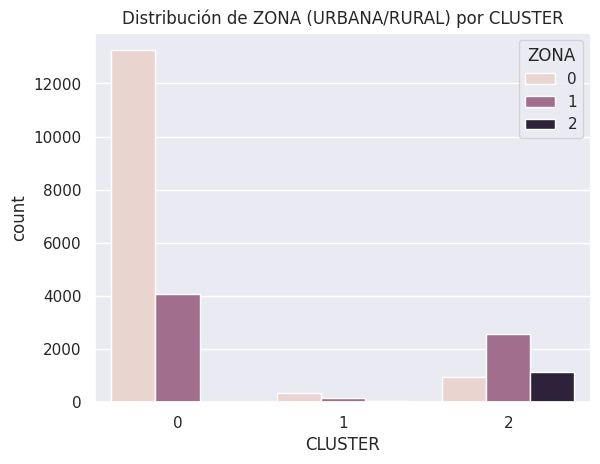

In [ ]:
#Visualizamos
sns.countplot(data=df, x=df_unido_ml2['CLUSTER'], hue= df_unido_ml2['ZONA'])
plt.title('Distribución de ZONA (URBANA/RURAL) por CLUSTER')
plt.show()

👆 El gráfico muestra la distribución de las tres zonas (URBANA, RURAL, MIXTA) dentro de cada cluster generado por KMeans.

**Cluster 0:**
* El más grande de los 3, representa la mayor cantidad de colegios e instituciones.
* Predominantemente urbano.
* También contiene una cantidad considerable de rurales.
* Casi ningún colegio mixto.

Podemos definirlo como el grupo urbano generalista.

**Cluster 1:**
* El más pequeño de los 3, representa la menor cantidad de colegios e instituciones.
* Aparece en todas las zonas pero con cantidades mínimas.

Puede representar casos atípicos o especializados, con alto perfil en discapacidades o infraestructura.

**Cluster 2:**
* Más balanceado.
* Tiene Una proporción interesante de zona mixta, Rurales y urbanas bien representadas.

Este podría ser el grupo más diverso y potencialmente el que más refleja instituciones con múltiples sedes o modelos híbridos.

**Creamos la tabla de clusteres, en formato % y formato float**

In [ ]:
#Formato float
tabla = df_unido_ml2.groupby('CLUSTER')[features].mean().T
tabla

CLUSTER,0,1,2
DI-COGNITIVO,0.065758,0.695167,0.081353
ENANISMO,0.000000,0.072491,0.000000
SORDOCEGUERA,0.000000,0.055762,0.000000
SV-CEGUERA,0.000000,0.957249,0.000000
PSICOSOCIAL,0.000000,0.033457,0.000000
NUMERO_DE_SEDES,1.425437,3.366171,7.270606
ESTRATO 1,0.000000,0.169145,0.593449
ESTRATO 2,0.048958,0.076208,0.082209
ESTRATO 3,0.035968,0.031599,0.006637
ESTRATO 4,0.013048,0.016729,0.000428


In [ ]:
#Formato en porcentajes %
# 1. Convertir a porcentaje
tabla_pct = tabla * 100

# 2. Redondear y convertir a string con %
tabla_formateada = tabla_pct.round(1).astype(str) + '%'

print(tabla_formateada.to_string())

CLUSTER               0       1       2
DI-COGNITIVO       6.6%   69.5%    8.1%
ENANISMO           0.0%    7.2%    0.0%
SORDOCEGUERA       0.0%    5.6%    0.0%
SV-CEGUERA         0.0%   95.7%    0.0%
PSICOSOCIAL        0.0%    3.3%    0.0%
NUMERO_DE_SEDES  142.5%  336.6%  727.1%
ESTRATO 1          0.0%   16.9%   59.3%
ESTRATO 2          4.9%    7.6%    8.2%
ESTRATO 3          3.6%    3.2%    0.7%
ESTRATO 4          1.3%    1.7%    0.0%
ESTRATO 5          0.4%    0.6%    0.0%
ESTRATO 6          0.3%    0.2%    0.0%
ZONA              23.5%   45.9%  103.9%


**¿Que nos dice esta tabla?**

**Cluster 0**
* La zona promedio: 0.235 → principalmente urbano.
* Discapacidades casi ausentes (todas ≈ 0).
* Sedes: promedio de 1.42 → pequeñas.
* Estratos altos marginales, destaca un poco ESTRATO 2 y ESTRATO 3.

Podemos definir este cluster como el que representa la “mínima inclusión urbana”.

**Cluster 1**

* La zona promedio: 0.459 → mezcla de urbano y rural.
* Alta inclusión:
 * SV-CEGUERA → 95.7%
 * DI-COGNITIVO → 69.5%
 * ENANISMO, SORDOCEGUERA, etc. también presentes.
* Sedes promedio: 3.37 → infraestructura intermedia.
* Estrato 1: presente en 16.9% → población vulnerable.

Este cluster representa instituciones especializadas en inclusión, destacando las discapacidades sensorial/cognitiva.

**Cluster 2**

* La zona promedio es 1.0389 → mayoría claramente mixta o rural.
* Número de sedes: 7.27 (la mas alta agrupación) → instituciones dispersas, rurales, multisedes.
* Casi ninguna discapacidad registrada.
* Estrato 1 dominante: 59.3%. Representa zonas

Se puede definir como el cluster rural/mixto vulnerable, con baja inclusión documentada.

▶ **Conlusiones:**
* La zona mixta (ZONA = 2) aporta claridad en el modelo:
 * Se concentra mayormente en Cluster 2.
 * Tiene un perfil claro: muchas sedes, estrato bajo, pero baja inclusión.
* El cluster más inclusivo (Cluster 1) está bien definido:
 * Aparece asociado a discapacidades sensoriales y cognitivas.
 * Tiene una proporción interesante de zonas urbanas y rurales.
* Cluster 0 sigue agrupando a la mayoría, pero sin inclusión significativa. De hecho, representa que la mayoría de escuelas en colombia no registran o no poseen alumnos con estas discapacidades ni la capacidad de atender estos mismos.

🟢 **Conclusiones finales del modelo:**

✅ En el Cluster 1, el 69.5% de las instituciones educativas registran atención a estudiantes con discapacidad cognitiva (DI-COGNITIVO), mientras que un 95.7% atienden estudiantes con ceguera severa (SV-CEGUERA). Este grupo representa un perfil institucional especializado en inclusión sensorial y cognitiva, con un promedio de 3.3 sedes por institución y una participación significativa de instituciones ubicadas en zonas urbanas y rurales.

✅ Por otro lado, el Cluster 2, con un promedio de 7.2 sedes por institución y un 59.3% en estrato 1, agrupa principalmente a instituciones ubicadas en zonas mixtas o rurales, pero con baja cobertura en atención a discapacidades. Este grupo podría reflejar instituciones multisedes con menor capacidad o registro en inclusión.

✅ Finalmente, el Cluster 0, que concentra la mayoría de las instituciones del conjunto analizado, presenta una cobertura mínima en todos los tipos de discapacidad (<7%) y se caracteriza por ser predominantemente urbano (76.5%) y con instituciones de tamaño reducido (1.4 sedes en promedio).

**En cuanto a la hipotesis: **

▶ Pese a que este modelo no está enfocado a hacer predicciones, decidimos aplicarlo en nuestro proyecto para hacer uso de las herramientas que el aprendizaje automatico nos puede brindar. Si bien, optamos por este modelo de agrupación dado a los resultados poco satisfactorios de los anteriores modelos predictivos, este nuevo enfoque nos ha permitido ver como se agrupan ciertos colegios del pais en base a sus caracteristicas (Zona, estrato, etc.)
Los modelos predictivo que usamos no son lo suficientemente confiables para determinar si una discapacidad estara presente dependiendo de la zona de ubicación de una institución educativa. A simple vista podemos decir que ambos modelos refutan nuestra hipotesis principal y afirman la hipotesis nula.

▶ Con respecto al modelo de aprendizaje no supervisado, el cluter 1 sí valida nuestra hipótesis, ya que las instituciones urbanas tienen una alta representación y son las que más discapacidades atienden.

El cluster 2 refuerza nuestra hipótesis desde el contraste: las instituciones rurales/mixtas no están prestando atención significativa a estudiantes con discapacidad, a pesar de su alcance territorial.

Finalmente determinamos que el análisis revela que las instituciones urbanas tienen mayor presencia en el cluster con más cobertura de discapacidades. Las rurales y mixtas, aunque con amplia cobertura territorial (mayor número de sedes), muestran niveles casi nulos de atención a estudiantes con discapacidad. Esto respalda parcialmente la hipótesis, aunque evidencia que no todas las instituciones urbanas están igualmente preparadas.”